In [1]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder
import pyECLAT as pe
import numpy as np
import warnings
import matplotlib.pyplot as plt
import time
warnings.filterwarnings("ignore")

In [2]:
folder = '/Users/lam.nguyen/Desktop/GithubClone/KPDL_Final'

Read data


In [3]:
books = pd.read_csv(folder + '/Books.csv')

# Apriori

In [4]:
# Nếu dữ liệu đã ở dạng nhị phân (0 và 1), dòng dưới đây sẽ chuyển đổi sang kiểu Boolean
apriori_data = books.applymap(lambda x: True if x == 1 else False)

apriori_data = apriori_data.astype(bool)
print(apriori_data.head())

   Child  Youth   Cook  Science  Music    Art   Geog  Sport  Tourism  \
0  False   True  False     True  False  False   True  False    False   
1   True  False  False    False  False  False  False  False    False   
2  False  False  False    False  False  False  False  False    False   
3   True   True   True    False   True  False   True  False    False   
4  False  False   True    False  False  False   True  False    False   

   Business     IT  
0     False  False  
1     False  False  
2     False  False  
3     False  False  
4     False  False  


In [31]:
# Tính các tập phổ biến có min_support = 10% 
frequent_itemsets = apriori(apriori_data, min_support=0.2, use_colnames=True)

print("\n=== Apriori - Các tập phổ biến ===")
print(frequent_itemsets)


=== Apriori - Các tập phổ biến ===
    support          itemsets
0    0.4230           (Child)
1    0.2475           (Youth)
2    0.4310            (Cook)
3    0.2820         (Science)
4    0.2145           (Music)
5    0.2410             (Art)
6    0.2760            (Geog)
7    0.1650    (Youth, Child)
8    0.2560     (Cook, Child)
9    0.1840  (Science, Child)
10   0.1515    (Music, Child)
11   0.1625      (Art, Child)
12   0.1950     (Child, Geog)
13   0.1620     (Cook, Youth)
14   0.1875   (Science, Cook)
15   0.1525     (Music, Cook)
16   0.1670       (Cook, Art)
17   0.1925      (Cook, Geog)


In [32]:
# Tính số lượng itemsets dựa vào frequent_itemsets
num_itemsets_apriori = len(frequent_itemsets)

# Khởi tạo luật kết hợp dựa trên frequent_itemsets đó
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets_apriori, metric="confidence", min_threshold=0.2)


print("Luật kết hợp:")
print(rules)

Luật kết hợp:
   antecedents consequents  antecedent support  consequent support  support  \
0      (Youth)     (Child)              0.2475              0.4230   0.1650   
1      (Child)     (Youth)              0.4230              0.2475   0.1650   
2       (Cook)     (Child)              0.4310              0.4230   0.2560   
3      (Child)      (Cook)              0.4230              0.4310   0.2560   
4    (Science)     (Child)              0.2820              0.4230   0.1840   
5      (Child)   (Science)              0.4230              0.2820   0.1840   
6      (Music)     (Child)              0.2145              0.4230   0.1515   
7      (Child)     (Music)              0.4230              0.2145   0.1515   
8        (Art)     (Child)              0.2410              0.4230   0.1625   
9      (Child)       (Art)              0.4230              0.2410   0.1625   
10     (Child)      (Geog)              0.4230              0.2760   0.1950   
11      (Geog)     (Child)            

# FP-growth

In [25]:
# # Tính toán các tập hợp thường gặp bằng FP-Growth
# frequent_itemsets_fp = fpgrowth(books, min_support=0.01, use_colnames=True)

# # Kiểm tra kết quả
# print(frequent_itemsets_fp)
# # Tạo các quy tắc kết hợp
# rules_fp = association_rules(frequent_itemsets_fp, num_itemsets=num_itemsets_fp, metric="lift", min_threshold=1)

# FP-Growth Algorithm
frequent_itemsets_fp = fpgrowth(books, min_support=0.2, use_colnames=True)
num_itemsets_fp = len(frequent_itemsets_fp)
rules_fp = association_rules(frequent_itemsets_fp, num_itemsets=num_itemsets_fp, metric="confidence", min_threshold=0.2)

# Displaying results for FP-Growth
# print("\n=== FP-Growth - Các tập phổ biến ===")
# fp_results = frequent_itemsets_fp[['itemsets', 'support']].sort_values(by='support', ascending=False)
# print(fp_results)

print("\n=== Strong Association Rules (FP-Growth) ===")
fp_rules_results = rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending=False)
print(fp_rules_results)



=== Strong Association Rules (FP-Growth) ===
   antecedents consequents  support  confidence      lift
14     (Music)      (Cook)   0.1525    0.710956  1.649549
5       (Geog)     (Child)   0.1950    0.706522  1.670264
16     (Music)     (Child)   0.1515    0.706294  1.669725
7       (Geog)      (Cook)   0.1925    0.697464  1.618245
21       (Art)      (Cook)   0.1670    0.692946  1.607763
18       (Art)     (Child)   0.1625    0.674274  1.594028
8      (Youth)     (Child)   0.1650    0.666667  1.576044
2    (Science)      (Cook)   0.1875    0.664894  1.542677
11     (Youth)      (Cook)   0.1620    0.654545  1.518667
0    (Science)     (Child)   0.1840    0.652482  1.542511
13     (Child)      (Cook)   0.2560    0.605201  1.404179
12      (Cook)     (Child)   0.2560    0.593968  1.404179
4      (Child)      (Geog)   0.1950    0.460993  1.670264
6       (Cook)      (Geog)   0.1925    0.446636  1.618245
3       (Cook)   (Science)   0.1875    0.435035  1.542677
1      (Child)   (Science)

# ECLAT


In [8]:
# Chuyển đổi dữ liệu sang horizational format
result = books.apply(lambda row: [col for col, val in row.items() if val == 1] + [None] * (len(books.columns) - sum(row)), axis=1)

# Chuyển đổi kết quả về dataframe mới
result_df = pd.DataFrame(result.tolist(), columns=books.columns)

# Thay đổi header thành số 0, 1, 2, 3,...
result_df.columns = range(len(result_df.columns))

# Hiển thị kết quả
result_df

,0,1,2,3,4,5,6,7,8,9,10
0,Youth,Science,Geog,None,None,None,None,None,None,None,None
1,Child,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None
3,Child,Youth,Cook,Music,Geog,None,None,None,None,None,None
4,Cook,Geog,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1995,Cook,Art,Geog,Sport,Business,IT,None,None,None,None,None
1996,None,None,None,None,None,None,None,None,None,None,None
1997,None,None,None,None,None,None,None,None,None,None,None
1998,Cook,None,None,None,None,None,None,None,None,None,None


In [9]:
# Replace None with NaN
result_df = result_df.replace({None: np.nan})

# Hiển thị kết quả
result_df

,0,1,2,3,4,5,6,7,8,9,10
0,Youth,Science,Geog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Child,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Child,Youth,Cook,Music,Geog,NaN,NaN,NaN,NaN,NaN,NaN
4,Cook,Geog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,Cook,Art,Geog,Sport,Business,IT,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,Cook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
eclat_instance = pe.ECLAT(data=result_df,verbose=True)
# the item shoud appear at least at 5% of transactions
min_support = 0.2
# start from transactions containing at least 2 items
min_combination = 1
# up to maximum items per transaction
max_combination = result_df.apply(lambda row: sum(row.notna()), axis=1).max()
rule_indices, rule_supports = eclat_instance.fit(min_support=min_support, min_combination=min_combination, max_combination=max_combination, separator=' & ', verbose=True)

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 572.82it/s]


Combination 1 by 1


9it [00:00, 122.94it/s]


Combination 2 by 2


36it [00:00, 165.34it/s]


Combination 3 by 3


84it [00:00, 158.78it/s]


Combination 4 by 4


126it [00:00, 225.02it/s]


Combination 5 by 5


126it [00:00, 196.34it/s]


Combination 6 by 6


84it [00:00, 123.60it/s]


Combination 7 by 7


36it [00:00, 137.59it/s]


Combination 8 by 8


9it [00:00, 113.78it/s]


Combination 9 by 9


1it [00:00, 92.17it/s]


Combination 10 by 10


0it [00:00, ?it/s]


Combination 11 by 11


0it [00:00, ?it/s]


In [11]:
result = pd.DataFrame(rule_supports.items(),columns=['Item', 'Support'])
print("\n=== ECLAT - Các tập phổ biến ===")
result.sort_values(by=['Support'], ascending=False)


=== ECLAT - Các tập phổ biến ===


,Item,Support
8,Cook,0.4310
5,Child,0.4230
7,Science,0.2820
6,Geog,0.2760
25,Child & Cook,0.2560
4,Youth,0.2475
1,Art,0.2410
3,Music,0.2145
23,Child & Geog,0.1950
27,Geog & Cook,0.1925


# Comparison - Time Performance

## Average time and time each loop counts (200 loops)

In [12]:
loop = 200
apriori_time = []
fpgrowth_time = []
eclat_time = []
for i in range(loop):
    #Time of ECLAT
    eclat_start = time.time()
    eclat_instance = pe.ECLAT(data=result_df,verbose=True)
    # rules_ind, rule_sup = eclat_instance.fit(min_support=min_support, min_combination=min_combination, max_combination=max_combination, separator=' & ', verbose=True)
    eclat_end = time.time()
    eclat_time.append(eclat_end - eclat_start)
    
    #Time of FP-Growth
    fpgrowth_start = time.time()
    fpgrowth_instance = fpgrowth(books, min_support=0.2, use_colnames=True)
    fpgrowth_end = time.time()
    fpgrowth_time.append(fpgrowth_end - fpgrowth_start)

    
    #Time of Apriori
    apriori_start = time.time()
    apriori_instance = apriori(apriori_data, min_support=0.2, use_colnames=True)
    apriori_end = time.time()
    apriori_time.append(apriori_end - apriori_start)




100%|██████████| 11/11 [00:00<00:00, 1075.69it/s]


apriori average time: 0.006071116924285889
fp-growth average time: 0.040378711223602294
eclat average time: 0.14048216938972474


Text(0.5, 1.0, 'Thời gian chạy của ECLAT, Apriori và FP-Growth với số vòng lặp tăng')

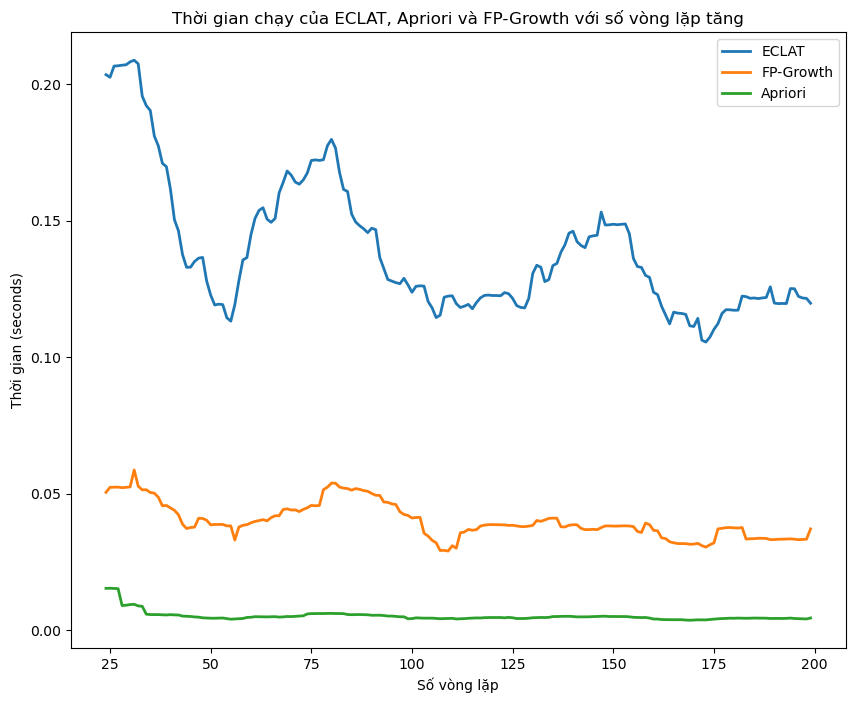

In [13]:
# Calculate moving averages for smoothing
window = 25 # Adjust window size for desired smoothness
eclat_smooth = pd.Series(eclat_time).rolling(window=window).mean()
fpgrowth_smooth = pd.Series(fpgrowth_time).rolling(window=window).mean()
apriori_smooth = pd.Series(apriori_time).rolling(window=window).mean()

print('apriori average time:', sum(apriori_time) / len(apriori_time))
print('fp-growth average time:', sum(fpgrowth_time) / len(fpgrowth_time))
print('eclat average time:', sum(eclat_time) / len(eclat_time))

plt.figure(figsize=(10,8))
plt.plot(range(loop), eclat_smooth, label='ECLAT', linewidth=2)
plt.plot(range(loop), fpgrowth_smooth, label='FP-Growth', linewidth=2)
plt.plot(range(loop), apriori_smooth, label='Apriori', linewidth=2)
plt.legend()
plt.xlabel('Số vòng lặp')
plt.ylabel('Thời gian (seconds)')
plt.title('Thời gian chạy của ECLAT, Apriori và FP-Growth với số vòng lặp tăng')

## When dataset size increases

In [14]:
dataset_size = [size for size in range(100, books.shape[0], 100)]

In [15]:
apriori_time_size = []
fpgrowth_time_size = []
eclat_time_size = []
for size in dataset_size:
    #Time of FP-Growth
    fpgrowth_start = time.time()
    fpgrowth_instance = fpgrowth(books.iloc[:size], min_support=0.2, use_colnames=True)
    fpgrowth_end = time.time()
    fpgrowth_time_size.append(fpgrowth_end - fpgrowth_start)

    #Time of ECLAT
    eclat_start = time.time()
    eclat_instance = pe.ECLAT(data=result_df.iloc[:size],verbose=True)
    # rules_ind, rule_sup = eclat_instance.fit(min_support=min_support, min_combination=min_combination, max_combination=max_combination, separator=' & ', verbose=True)
    eclat_end = time.time()
    eclat_time_size.append(eclat_end - eclat_start)
    
    #Time of Apriori
    apriori_start = time.time()
    apriori_instance = apriori(apriori_data.iloc[:size], min_support=0.2, use_colnames=True)
    apriori_end = time.time()
    apriori_time_size.append(apriori_end - apriori_start)

100%|██████████| 11/11 [00:00<00:00, 600.60it/s]


apriori average time: 0.007611651169626336
fp-growth average time: 0.02764289002669485
eclat average time: 0.13662490091825785


Text(0.5, 1.0, 'Thời gian chạy của ECLAT, Apriori và FP-Growth khi tăng kích thước dữ liệu')

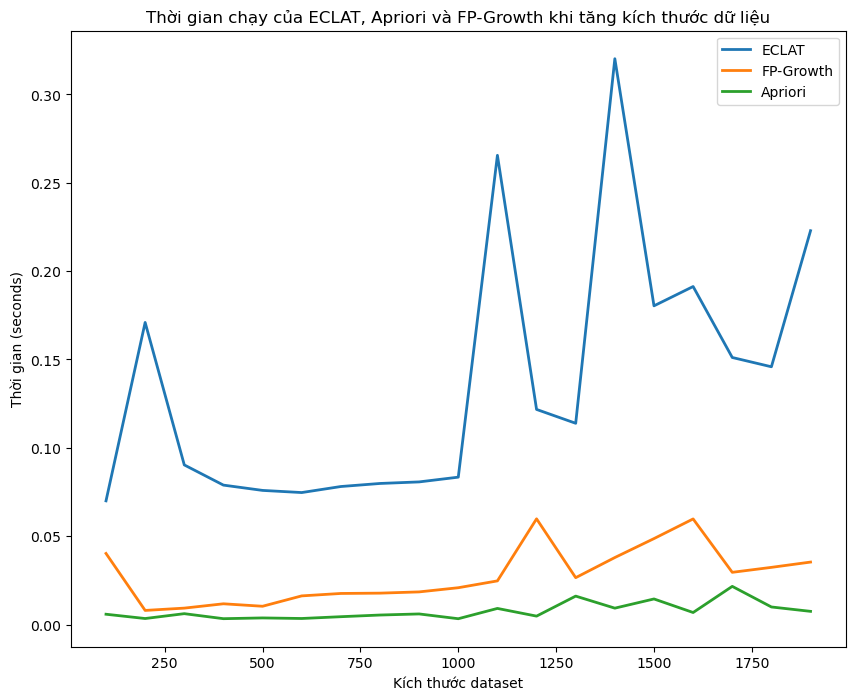

In [16]:
print('apriori average time:', sum(apriori_time_size) / len(apriori_time_size))
print('fp-growth average time:', sum(fpgrowth_time_size) / len(fpgrowth_time_size))
print('eclat average time:', sum(eclat_time_size) / len(eclat_time_size))

plt.figure(figsize=(10,8))
plt.plot(dataset_size, eclat_time_size, label='ECLAT', linewidth=2)
plt.plot(dataset_size, fpgrowth_time_size, label='FP-Growth', linewidth=2)
plt.plot(dataset_size, apriori_time_size, label='Apriori', linewidth=2)
plt.legend()
plt.xlabel('Kích thước dataset')
plt.ylabel('Thời gian (seconds)')
plt.title('Thời gian chạy của ECLAT, Apriori và FP-Growth khi tăng kích thước dữ liệu')

## When minimum support increases

In [17]:
minSup = np.arange(0, 1, 0.1)[1:] #Start from 1: to remove the 0 becasue 0 will take all the combination of itemsets

In [18]:
apriori_time_sup = []
fpgrowth_time_sup = []
eclat_time_sup = []
for sup in minSup:
    #Time of FP-Growth
    fpgrowth_start = time.time()
    fpgrowth_instance = fpgrowth(books, min_support=sup, use_colnames=True)
    fpgrowth_end = time.time()
    fpgrowth_time_sup.append(fpgrowth_end - fpgrowth_start)

    #Time of ECLAT
    eclat_start = time.time()
    eclat_instance = pe.ECLAT(data=result_df,verbose=True)
    rules_ind, rule_sup = eclat_instance.fit(min_support=sup, min_combination=min_combination, max_combination=max_combination, separator=' & ', verbose=True)
    eclat_end = time.time()
    eclat_time_sup.append(eclat_end - eclat_start)
    
    #Time of Apriori
    apriori_start = time.time()
    apriori_instance = apriori(apriori_data, min_support=sup, use_colnames=True)
    apriori_end = time.time()
    apriori_time_sup.append(apriori_end - apriori_start)

100%|██████████| 11/11 [00:00<00:00, 1038.15it/s]


Combination 1 by 1


9it [00:00, 148.46it/s]


Combination 2 by 2


36it [00:00, 179.88it/s]


Combination 3 by 3


84it [00:00, 224.82it/s]


Combination 4 by 4


126it [00:00, 225.87it/s]


Combination 5 by 5


126it [00:00, 208.26it/s]


Combination 6 by 6


84it [00:00, 186.72it/s]


Combination 7 by 7


36it [00:00, 165.76it/s]


Combination 8 by 8


9it [00:00, 136.81it/s]


Combination 9 by 9


1it [00:00, 72.78it/s]


Combination 10 by 10


0it [00:00, ?it/s]


Combination 11 by 11


0it [00:00, ?it/s]
100%|██████████| 11/11 [00:00<00:00, 847.35it/s]


Combination 1 by 1


7it [00:00, 147.52it/s]


Combination 2 by 2


21it [00:00, 252.36it/s]


Combination 3 by 3


35it [00:00, 247.98it/s]


Combination 4 by 4


35it [00:00, 211.28it/s]


Combination 5 by 5


21it [00:00, 192.21it/s]


Combination 6 by 6


7it [00:00, 178.36it/s]


Combination 7 by 7


1it [00:00, 138.12it/s]


Combination 8 by 8


0it [00:00, ?it/s]


Combination 9 by 9


0it [00:00, ?it/s]


Combination 10 by 10


0it [00:00, ?it/s]


Combination 11 by 11


0it [00:00, ?it/s]
100%|██████████| 11/11 [00:00<00:00, 966.51it/s]


Combination 1 by 1


2it [00:00, 119.24it/s]


Combination 2 by 2


1it [00:00, 228.42it/s]


Combination 3 by 3


0it [00:00, ?it/s]


Combination 4 by 4


0it [00:00, ?it/s]


Combination 5 by 5


0it [00:00, ?it/s]


Combination 6 by 6


0it [00:00, ?it/s]


Combination 7 by 7


0it [00:00, ?it/s]


Combination 8 by 8


0it [00:00, ?it/s]


Combination 9 by 9


0it [00:00, ?it/s]


Combination 10 by 10


0it [00:00, ?it/s]


Combination 11 by 11


0it [00:00, ?it/s]
100%|██████████| 11/11 [00:00<00:00, 669.47it/s]


Combination 1 by 1


2it [00:00, 155.11it/s]


Combination 2 by 2


1it [00:00, 98.61it/s]


Combination 3 by 3


0it [00:00, ?it/s]


Combination 4 by 4


0it [00:00, ?it/s]


Combination 5 by 5


0it [00:00, ?it/s]


Combination 6 by 6


0it [00:00, ?it/s]


Combination 7 by 7


0it [00:00, ?it/s]


Combination 8 by 8


0it [00:00, ?it/s]


Combination 9 by 9


0it [00:00, ?it/s]


Combination 10 by 10


0it [00:00, ?it/s]


Combination 11 by 11


0it [00:00, ?it/s]
100%|██████████| 11/11 [00:00<00:00, 1099.35it/s]


Combination 1 by 1


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 3 by 3


0it [00:00, ?it/s]


Combination 4 by 4


0it [00:00, ?it/s]


Combination 5 by 5


0it [00:00, ?it/s]


Combination 6 by 6


0it [00:00, ?it/s]


Combination 7 by 7


0it [00:00, ?it/s]


Combination 8 by 8


0it [00:00, ?it/s]


Combination 9 by 9


0it [00:00, ?it/s]


Combination 10 by 10


0it [00:00, ?it/s]


Combination 11 by 11


0it [00:00, ?it/s]
100%|██████████| 11/11 [00:00<00:00, 912.51it/s]


Combination 1 by 1


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 3 by 3


0it [00:00, ?it/s]


Combination 4 by 4


0it [00:00, ?it/s]


Combination 5 by 5


0it [00:00, ?it/s]


Combination 6 by 6


0it [00:00, ?it/s]


Combination 7 by 7


0it [00:00, ?it/s]


Combination 8 by 8


0it [00:00, ?it/s]


Combination 9 by 9


0it [00:00, ?it/s]


Combination 10 by 10


0it [00:00, ?it/s]


Combination 11 by 11


0it [00:00, ?it/s]
100%|██████████| 11/11 [00:00<00:00, 1589.57it/s]


Combination 1 by 1


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 3 by 3


0it [00:00, ?it/s]


Combination 4 by 4


0it [00:00, ?it/s]


Combination 5 by 5


0it [00:00, ?it/s]


Combination 6 by 6


0it [00:00, ?it/s]


Combination 7 by 7


0it [00:00, ?it/s]


Combination 8 by 8


0it [00:00, ?it/s]


Combination 9 by 9


0it [00:00, ?it/s]


Combination 10 by 10


0it [00:00, ?it/s]


Combination 11 by 11


0it [00:00, ?it/s]
100%|██████████| 11/11 [00:00<00:00, 1027.92it/s]

Combination 1 by 1



0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 3 by 3


0it [00:00, ?it/s]


Combination 4 by 4


0it [00:00, ?it/s]


Combination 5 by 5


0it [00:00, ?it/s]


Combination 6 by 6


0it [00:00, ?it/s]


Combination 7 by 7


0it [00:00, ?it/s]


Combination 8 by 8


0it [00:00, ?it/s]


Combination 9 by 9


0it [00:00, ?it/s]


Combination 10 by 10


0it [00:00, ?it/s]


Combination 11 by 11


0it [00:00, ?it/s]
100%|██████████| 11/11 [00:00<00:00, 1094.75it/s]


Combination 1 by 1


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 3 by 3


0it [00:00, ?it/s]


Combination 4 by 4


0it [00:00, ?it/s]


Combination 5 by 5


0it [00:00, ?it/s]


Combination 6 by 6


0it [00:00, ?it/s]


Combination 7 by 7


0it [00:00, ?it/s]


Combination 8 by 8


0it [00:00, ?it/s]


Combination 9 by 9


0it [00:00, ?it/s]


Combination 10 by 10


0it [00:00, ?it/s]


Combination 11 by 11


0it [00:00, ?it/s]


apriori average time: 0.008442428376939561
fp-growth average time: 0.07649077309502496
eclat average time: 0.6515496042039659


Text(0.5, 1.0, 'Thời gian chạy của ECLAT, Apriori và FP-Growth khi minimum support tăng')

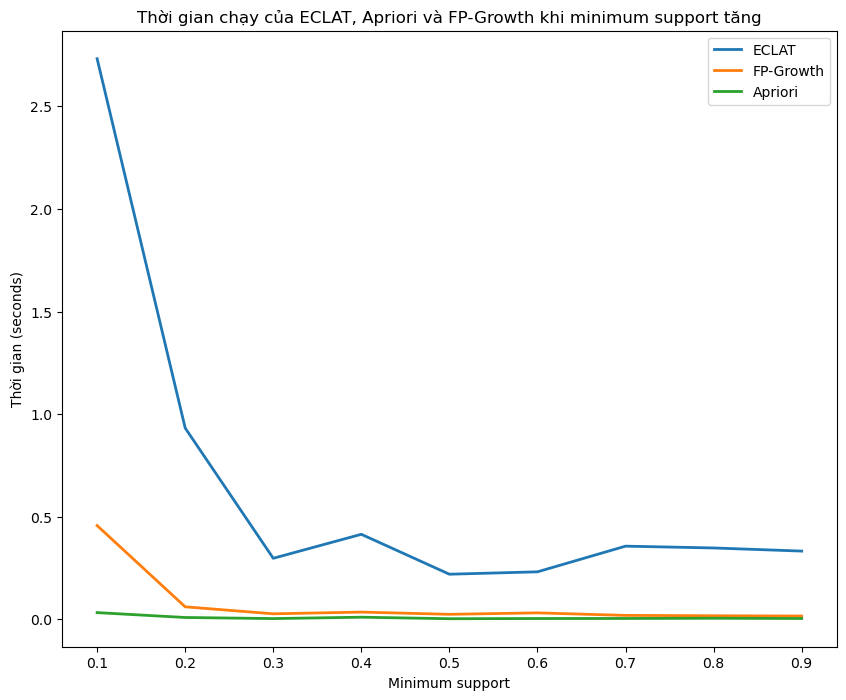

In [19]:
print('apriori average time:', sum(apriori_time_sup) / len(apriori_time_sup))
print('fp-growth average time:', sum(fpgrowth_time_sup) / len(fpgrowth_time_sup))
print('eclat average time:', sum(eclat_time_sup) / len(eclat_time_sup))

plt.figure(figsize=(10,8))
plt.plot(minSup, eclat_time_sup, label='ECLAT', linewidth=2)
plt.plot(minSup, fpgrowth_time_sup, label='FP-Growth', linewidth=2)
plt.plot(minSup, apriori_time_sup, label='Apriori', linewidth=2)
plt.legend()
plt.xlabel('Minimum support')
plt.ylabel('Thời gian (seconds)')
plt.title('Thời gian chạy của ECLAT, Apriori và FP-Growth khi minimum support tăng')

## When size of frequent itemset increases

In [20]:
max_size = len(books.columns)

In [21]:
apriori_time_freq = []
fpgrowth_time_freq = []
eclat_time_freq = []
for comb in range(max_size):
    #Time of FP-Growth
    fpgrowth_start = time.time()
    fpgrowth_instance = fpgrowth(books, min_support=0.1, max_len=comb, use_colnames=True)
    fpgrowth_end = time.time()
    fpgrowth_time_freq.append(fpgrowth_end - fpgrowth_start)

    #Time of ECLAT
    eclat_instance = pe.ECLAT(data=result_df,verbose=True)
    eclat_start = time.time()
    rules_ind, rule_freq = eclat_instance.fit(min_support=0.1, min_combination=min_combination, max_combination=comb, separator=' & ', verbose=True)
    eclat_end = time.time()
    eclat_time_freq.append(eclat_end - eclat_start)
    
    #Time of Apriori
    apriori_start = time.time()
    apriori_instance = apriori(apriori_data, min_support=0.1, max_len=comb, use_colnames=True)
    apriori_end = time.time()
    apriori_time_freq.append(apriori_end - apriori_start)

100%|██████████| 11/11 [00:00<00:00, 637.46it/s]


Combination 1 by 1


9it [00:00, 119.61it/s]
100%|██████████| 11/11 [00:00<00:00, 1239.15it/s]


Combination 1 by 1


9it [00:00, 165.10it/s]


Combination 2 by 2


36it [00:00, 191.19it/s]
100%|██████████| 11/11 [00:00<00:00, 706.04it/s]


Combination 1 by 1


9it [00:00, 140.92it/s]


Combination 2 by 2


36it [00:00, 200.55it/s]


Combination 3 by 3


84it [00:00, 103.46it/s]
100%|██████████| 11/11 [00:00<00:00, 946.56it/s]


Combination 1 by 1


9it [00:00, 161.31it/s]


Combination 2 by 2


36it [00:00, 152.39it/s]


Combination 3 by 3


84it [00:00, 171.19it/s]


Combination 4 by 4


126it [00:00, 156.05it/s]
100%|██████████| 11/11 [00:00<00:00, 598.22it/s]


Combination 1 by 1


9it [00:00, 53.42it/s]


Combination 2 by 2


36it [00:00, 148.95it/s]


Combination 3 by 3


84it [00:00, 227.02it/s]


Combination 4 by 4


126it [00:00, 261.79it/s]


Combination 5 by 5


126it [00:00, 165.58it/s]
100%|██████████| 11/11 [00:00<00:00, 858.70it/s]


Combination 1 by 1


9it [00:00, 162.82it/s]


Combination 2 by 2


36it [00:00, 160.19it/s]


Combination 3 by 3


84it [00:00, 237.32it/s]


Combination 4 by 4


126it [00:00, 163.52it/s]


Combination 5 by 5


126it [00:00, 131.40it/s]


Combination 6 by 6


84it [00:00, 185.72it/s]
100%|██████████| 11/11 [00:00<00:00, 949.19it/s]


Combination 1 by 1


9it [00:00, 58.60it/s]


Combination 2 by 2


36it [00:00, 57.42it/s]


Combination 3 by 3


84it [00:01, 62.95it/s]


Combination 4 by 4


126it [00:00, 127.78it/s]


Combination 5 by 5


126it [00:00, 152.33it/s]


Combination 6 by 6


84it [00:00, 172.00it/s]


Combination 7 by 7


36it [00:00, 170.01it/s]
100%|██████████| 11/11 [00:00<00:00, 692.96it/s]


Combination 1 by 1


9it [00:00, 132.74it/s]


Combination 2 by 2


36it [00:00, 109.16it/s]


Combination 3 by 3


84it [00:00, 143.88it/s]


Combination 4 by 4


126it [00:00, 166.33it/s]


Combination 5 by 5


126it [00:01, 110.64it/s]


Combination 6 by 6


84it [00:00, 124.77it/s]


Combination 7 by 7


36it [00:00, 127.85it/s]


Combination 8 by 8


9it [00:00, 130.87it/s]
100%|██████████| 11/11 [00:00<00:00, 1006.88it/s]


Combination 1 by 1


9it [00:00, 178.38it/s]


Combination 2 by 2


36it [00:00, 179.69it/s]


Combination 3 by 3


84it [00:00, 200.33it/s]


Combination 4 by 4


126it [00:00, 140.89it/s]


Combination 5 by 5


126it [00:00, 194.91it/s]


Combination 6 by 6


84it [00:00, 148.26it/s]


Combination 7 by 7


36it [00:00, 173.62it/s]


Combination 8 by 8


9it [00:00, 147.06it/s]


Combination 9 by 9


1it [00:00, 113.39it/s]
100%|██████████| 11/11 [00:00<00:00, 924.54it/s]


Combination 1 by 1


9it [00:00, 150.59it/s]


Combination 2 by 2


36it [00:00, 189.28it/s]


Combination 3 by 3


84it [00:00, 231.55it/s]


Combination 4 by 4


126it [00:00, 231.08it/s]


Combination 5 by 5


126it [00:00, 207.94it/s]


Combination 6 by 6


84it [00:00, 187.69it/s]


Combination 7 by 7


36it [00:00, 152.05it/s]


Combination 8 by 8


9it [00:00, 138.09it/s]


Combination 9 by 9


1it [00:00, 51.16it/s]


Combination 10 by 10


0it [00:00, ?it/s]


apriori average time: 0.011141191829334606
fp-growth average time: 0.22421834685585715
eclat average time: 2.077421014959162


Text(0.5, 1.0, 'Thời gian chạy của ECLAT, Apriori và FP-Growth khi Frequent Itemset size tăng')

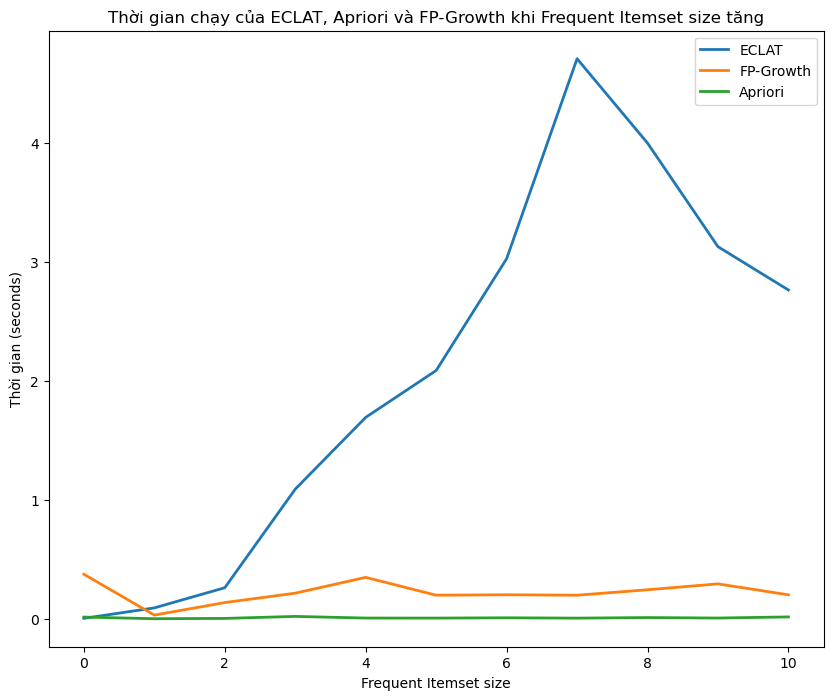

In [22]:
print('apriori average time:', sum(apriori_time_freq) / len(apriori_time_freq))
print('fp-growth average time:', sum(fpgrowth_time_freq) / len(fpgrowth_time_freq))
print('eclat average time:', sum(eclat_time_freq) / len(eclat_time_freq))

plt.figure(figsize=(10,8))
plt.plot(range(max_size), eclat_time_freq, label='ECLAT', linewidth=2)
plt.plot(range(max_size), fpgrowth_time_freq, label='FP-Growth', linewidth=2)
plt.plot(range(max_size), apriori_time_freq, label='Apriori', linewidth=2)
plt.legend()
plt.xlabel('Frequent Itemset size')
plt.ylabel('Thời gian (seconds)')
plt.title('Thời gian chạy của ECLAT, Apriori và FP-Growth khi Frequent Itemset size tăng')